# BNN on Pynq

This notebook covers how to use Binary Neural Networks on Pynq. 
It shows an example of handwritten digit recognition using a binarized neural network

## import the model of BNN

In [1]:
import bnn
print(bnn.available_params(bnn.NETWORK_LFC))

classifier = bnn.PynqBNN(network=bnn.NETWORK_LFC)
print(classifier)

['mnist', 'chars_merged']


In [15]:
import bnn
print(bnn.available_params(bnn.NETWORK_LFC))

#classifier = bnn.LfcClassifier('chars_merged')
classify = classifier.load_parameters("mnist")



['mnist', 'chars_merged']


In [2]:
classifier.load_parameters("chars_merged")
#print(mo)

### load the image, segment the area of letter and crop them

25
*****************************************************
25


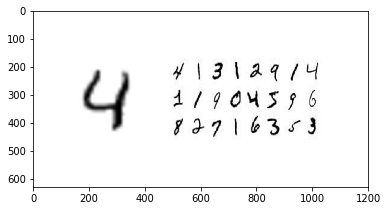

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

# inport the image
img = cv2.imread('ml-persistence-og-image.jpg')
#img = cv2.imread('7.jpg')
#img = cv2.imread('6.jpg')
#img = cv2.imread('5.jpg')
image_shape = img.shape # shape of the image
blur = cv2.GaussianBlur(img,(5,5),0)
#convert the image into gray
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
# apply threshold
ret,th = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#apply contour
image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
#print(gray)
print('*****************************************************')
#print(th)
sample = []
location = []
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

       
        
        crop = img[y:y+h,x:x+w]
        c = x,y
        location.append(c)
        #sample = sample + 1
        #crop.resize(28,28)
        #classifier.class_name(crop)
        sample.append(crop)
        #print(location)
        
        #plt.imshow(crop)
        #plt.show()
print(len(sample))
plt.imshow(img)
plt.show()

### load the BNN, recognition the crop image and writen recognition digit on correct position on it

In [20]:
#n = len(bnn_sample)
re = []
nbb = len(sample)
for dig in range(nbb):
    ima = sample[dig]
    image = PIL_Image.fromarray(ima)
    #ig = bnn_sample[l]
    classifier_cnv = bnn.CnvClassifier('streetview') # recognition image
    class_out=classifier_cnv.classify_image(image)
    print("Class name: {0}".format(classifier_cnv.class_name(class_out)))
    le = classifier_cnv.class_name(class_out)
    re.append(le)

Inference took 1637.00 microseconds
Classification rate: 610.87 images per second
Class name: 5
Inference took 1598.00 microseconds
Classification rate: 625.78 images per second
Class name: 7
Inference took 1596.00 microseconds
Classification rate: 626.57 images per second
Class name: 3
Inference took 1597.00 microseconds
Classification rate: 626.17 images per second
Class name: 1
Inference took 1591.00 microseconds
Classification rate: 628.54 images per second
Class name: 7
Inference took 1622.00 microseconds
Classification rate: 616.52 images per second
Class name: 8
Inference took 1600.00 microseconds
Classification rate: 625.00 images per second
Class name: 3
Inference took 1599.00 microseconds
Classification rate: 625.39 images per second
Class name: 6
Inference took 1595.00 microseconds
Classification rate: 626.96 images per second
Class name: 9
Inference took 1587.00 microseconds
Classification rate: 630.12 images per second
Class name: 9
Inference took 1590.00 microseconds
Clas

the recognition digit written on recognition postion

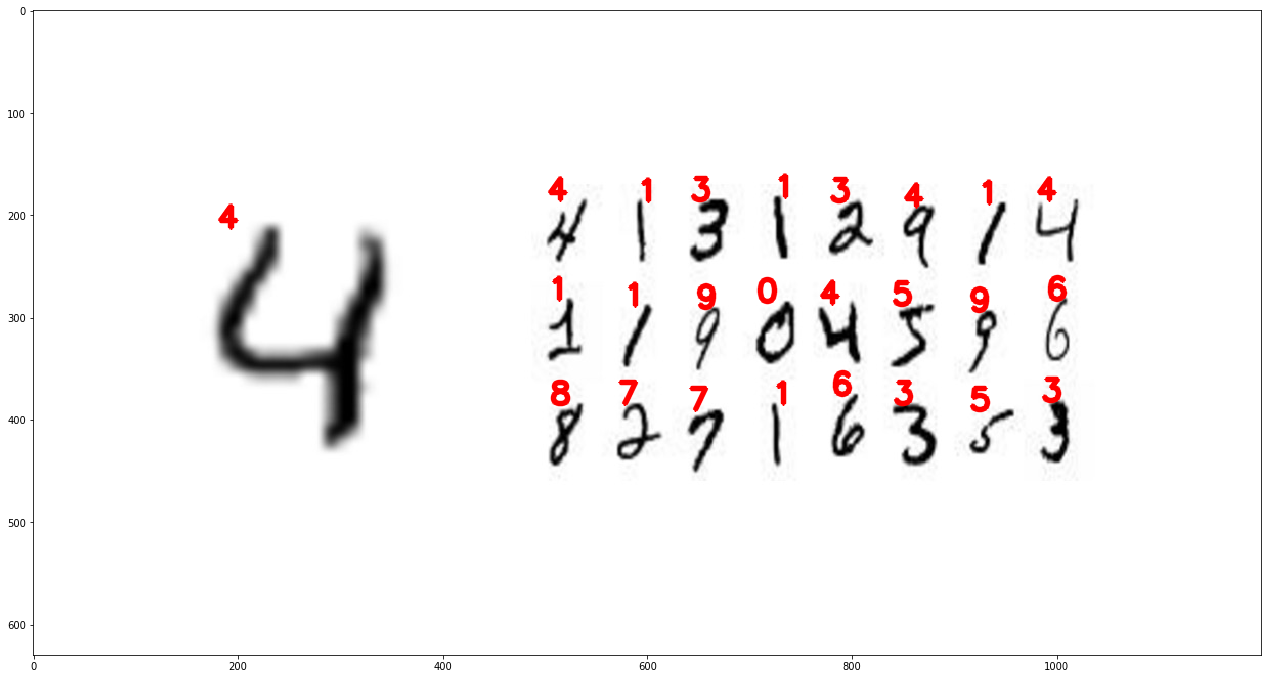

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
nu = len(re)
for let in range(nu):
    lett = re[let]
    loc = location[let]
    cv2.putText(img,str(lett),loc,font,1,(255,0,0),3,cv2.LINE_AA)
    
plt.figure(figsize=(22,52))
plt.imshow(img)
plt.show()